## What is the true normal human body temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. In 1992, this value was revised to 36.8$^{\circ}$C or 98.2$^{\circ}$F. 

#### Exercise
In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.

Answer the following questions **in this notebook below and submit to your Github account**. 

1.  Is the distribution of body temperatures normal? 
    - Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply. 
2.  Is the true population mean really 98.6 degrees F?
    - Bring out the one sample hypothesis test! In this situation, is it approriate to apply a z-test or a t-test? How will the result be different?
3.  At what temperature should we consider someone's temperature to be "abnormal"?
    - Start by computing the margin of error and confidence interval.
4.  Is there a significant difference between males and females in normal temperature?
    - Set up and solve for a two sample hypothesis testing.

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [14]:
import pandas as pd
%matplotlib inline
import matplotlib
matplotlib.style.use('ggplot')
import numpy as np
import matplotlib.pyplot as plt

In [40]:
df = pd.read_csv('data/human_body_temperature.csv')
np.mean(df[['temperature']])

temperature    98.249231
dtype: float64

1. To answer the first question we need to use the CLT. Indeed we have more than 30 independent observations and as we see in the histogram from this one sample we have not a strogly skewed distribution. Thus the distribution of the sample mean (of body temperature) is well approximated by the normal distribution

(array([  4.,   6.,  15.,  29.,  27.,  30.,  15.,   1.,   2.,   1.]),
 array([  96.3 ,   96.75,   97.2 ,   97.65,   98.1 ,   98.55,   99.  ,
          99.45,   99.9 ,  100.35,  100.8 ]),
 <a list of 10 Patch objects>)

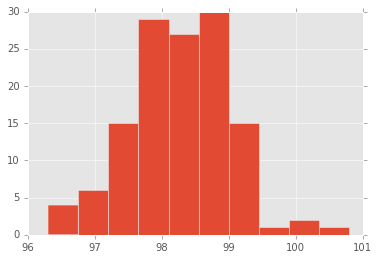

In [16]:
plt.hist(np.array(df[['temperature']]))


2. Since the distribution of the sample mean is normal we will use the z-value. The t-value is used when instead we have less observations in our sample and thus the hypothesis of the CLT re not true.

In [20]:
SE = np.std(df[['temperature']])/np.sqrt(len(df[['temperature']]))
Mean = np.mean(df[['temperature']])
zVal = (Mean - 98.6)/SE

In [39]:
import scipy.stats
pVal = scipy.stats.norm.cdf(zVal)*2 #2 tailed
pVal

array([  4.35231517e-08])

Since the p-value is very small we can reject the null hypothesis.

3. Margin of error and CI

In [41]:
ME = SE *1.96 #approximate 95% Margin of Error
print ME

temperature    0.125551
dtype: float64


In [43]:
CI = np.array([Mean -ME, Mean +ME]) #approximate 95% Confidence Interval
CI

array([[ 98.1236798 ],
       [ 98.37478173]])

4. Difference between two independent means

In [48]:
mean_F = np.mean(df[['temperature']][df['gender']=='F'])
mean_M = np.mean(df[['temperature']][df['gender']=='M'])
SE_F = np.std(df[['temperature']][df['gender']=='F'])
SE_M = np.std(df[['temperature']][df['gender']=='M'])
SE = np.sqrt((SE_F*SE_F)/(df['gender']=='F').sum()+(SE_M*SE_M)/(df['gender']=='M').sum())

In [49]:
zVal2Means = (mean_F-mean_M)/SE
zVal2Means

temperature    2.30322
dtype: float64

In [53]:
pVal2Means = scipy.stats.norm.cdf(-zVal2Means)*2 #2 tailed
pVal2Means

array([ 0.02126645])

Again this is under 5%, then we need to reject the null hypothesis that the two means are the same.